# Exploratory Data Analysis (EDA) - FraudDetectAI

## Description
In this section, we will **explore and analyze** the credit card fraud detection dataset to gain insights into its structure, class distribution, and key features. The goal is to:
- **Understand the dataset** (features, size, missing values, class balance).
- **Visualize data distributions** (transaction amounts, time, fraud vs. non-fraud).
- **Identify potential data patterns** useful for fraud detection.
- **Check correlations** between different features.

## Dataset Overview
This dataset is sourced from the **[Credit Card Fraud Detection dataset (mlg-ulb)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)**.

- **Total Transactions**: 284,807  
- **Fraud Cases**: Only **492 fraud transactions** (~0.172%)  
- **Class Imbalance**: Highly skewed towards non-fraud transactions.  
- **Features**:
  - **Time**: Number of seconds elapsed since the first transaction.  
  - **Amount**: Transaction amount in euros.  
  - **V1-V28**: **Anonymized PCA components** (to protect sensitive financial data).  
  - **Class**: **Target variable** (0 = Legit, 1 = Fraud).  

## Next Steps
Now, we will **load the dataset** and perform an initial exploration.

## Importing Required Libraries

In [20]:
# Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

Now, we will **load the dataset** and perform some basic checks to understand its structure.  
We will use the following functions:
- `.head()` → View the first few rows.
- `.info()` → Get dataset details (columns, types, memory usage).
- `.describe()` → Summary statistics for numerical features.
- `.isnull().sum()` → Check for missing values.

In [21]:
# Load the dataset
df = pd.read_csv("../datasets/creditcard.csv")

# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
# Get dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
# Get summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
# Check missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Initial Observations**:

- The dataset contains **no missing values**, so no imputation is needed.
- All columns are **numerical**; there are no categorical or text features.
- The `Time` and `Amount` columns are **interpretable**, while `V1-V28` are **anonymized PCA features**.
- The `Class` column is the **target variable**, where:
  - `0` → Legitimate transactions.
  - `1` → Fraudulent transactions.

## Visualizing Data Distributions

Now, we will **analyze and visualize** the distribution of key features in the dataset.  
This will help us understand:
- **Class distribution** (Fraud vs. Non-Fraud transactions).
- **Transaction amount distribution**.
- **Time-based fraud patterns**.
- **Distributions of PCA-transformed features (V1–V28)**.

By exploring these visualizations, we can gain insights into patterns that might help in fraud detection.

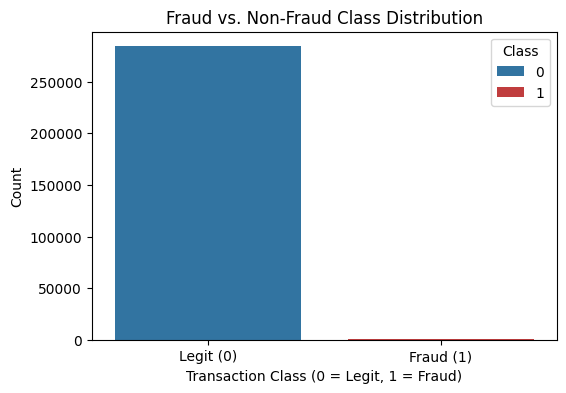

In [26]:
# Count of fraud vs. non-fraud transactions
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class"], hue=df["Class"], palette=["#1f77b4", "#d62728"])
plt.title("Fraud vs. Non-Fraud Class Distribution")
plt.xlabel("Transaction Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0,1], ["Legit (0)", "Fraud (1)"])

# Save the plot
plt.savefig("../images/fraud_vs_non_fraud_distribution.png")

# Show the plot
plt.show()

In [27]:
# Print class distribution percentage
fraud_ratio = df["Class"].value_counts(normalize=True) * 100
print(fraud_ratio)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


**Class Distribution Analysis**:

- The dataset is **highly imbalanced**, with **99.83%** of transactions being **legitimate (Class 0)** and only **0.17% fraudulent (Class 1)**.
- This extreme imbalance means that a standard classifier might **struggle to detect fraud**, as it could simply predict all transactions as non-fraud and still achieve high accuracy.
- To handle this imbalance, we may need techniques like **oversampling (SMOTE), undersampling, or cost-sensitive learning** to improve fraud detection.

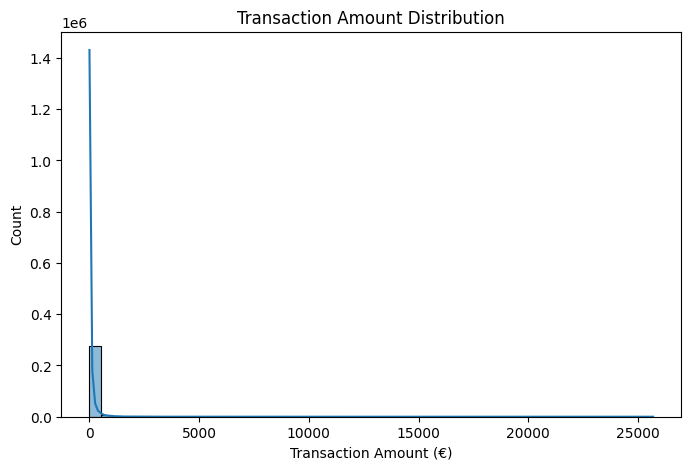

In [28]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(df["Amount"], bins=50, kde=True, color="#1f77b4")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount (€)")
plt.ylabel("Count")

# Save the plot
plt.savefig("../images/transaction_amount_distribution.png")

# Show the plot
plt.show();

**Transaction Amount Distribution Analysis**:

- The majority of transactions have **small amounts**, with a high concentration near **€0–100**.
- A few **high-value transactions** exist, causing a **long right tail** in the distribution.
- This **right-skewed distribution** suggests that most transactions involve **small amounts**, while **large transactions are rare**.
- We may need **scaling (e.g., log transformation or standardization)** to prevent large values from dominating our model.

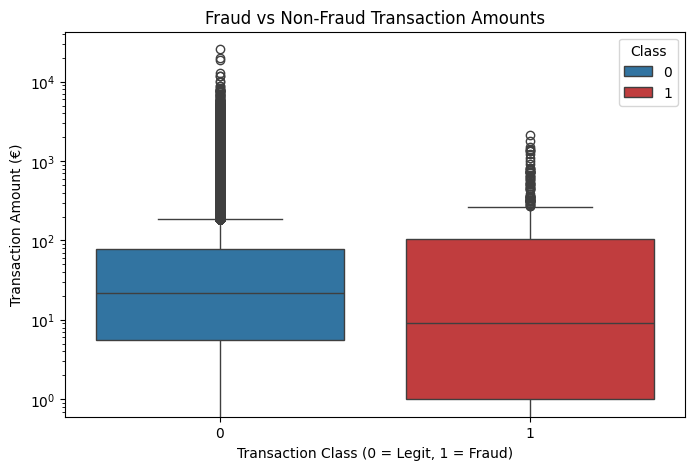

In [30]:
# Compare transaction amounts for fraud and non-fraud cases
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Class"], y=df["Amount"], hue=df["Class"], palette=["#1f77b4", "#d62728"])
plt.title("Fraud vs Non-Fraud Transaction Amounts")
plt.xlabel("Transaction Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Amount (€)")
plt.yscale("log")  # Log scale for better visualization

# Save the plot
plt.savefig("../images/fraud_vs_non_fraud_transaction_amounts.png")

# Show the plot
plt.show()

**Fraud vs. Non-Fraud Transaction Amounts**:

- Fraudulent transactions **do not have significantly higher amounts** compared to non-fraud transactions.
- Both fraud and non-fraud transactions have a **wide range of amounts**, but fraud transactions tend to have **slightly higher medians**.
- **Outliers** exist in both categories, with some transactions reaching very high amounts.
- Since the distributions overlap, **amount alone may not be a strong fraud indicator**, and we need to explore more features.
- Using **log transformation or standardization** may help models learn better.

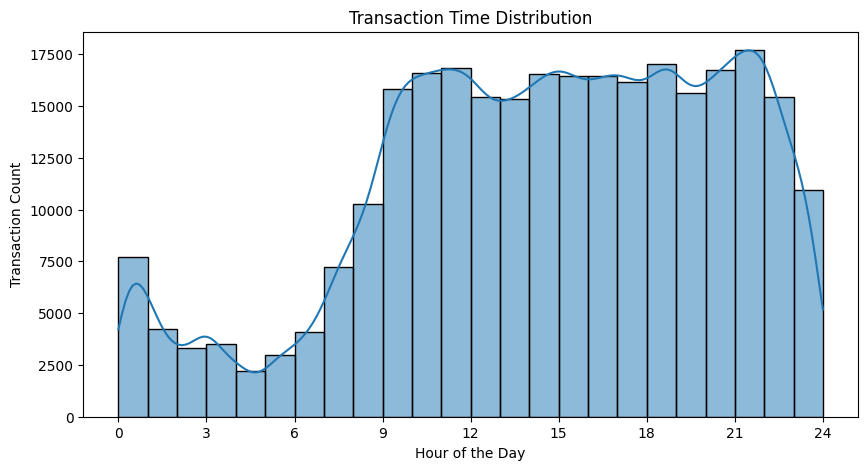

In [31]:
# Convert time into hours (assuming 'Time' is in seconds)
df["Hour"] = (df["Time"] / 3600) % 24  # Convert seconds to hours

# Plot the transaction time distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Hour"], bins=24, kde=True, color="#1f77b4")
plt.title("Transaction Time Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.xticks(range(0, 25, 3))  # Show labels every 3 hours

# Save the plot
plt.savefig("../images/transaction_time_distribution.png")

# Show the plot
plt.show()

**Transaction Time Distribution Analysis**:

- The number of transactions **fluctuates throughout the day**, with noticeable peaks.
- Transactions are **lower during early morning hours (2 AM - 6 AM)**.
- Activity **gradually increases** after 6 AM, reaching **a peak between 9 AM - 12 PM**.
- Transaction volume remains **relatively high during the afternoon and evening** but starts declining after 9 PM.
- This pattern suggests **more transactions occur during business hours**, which makes sense for typical card usage.

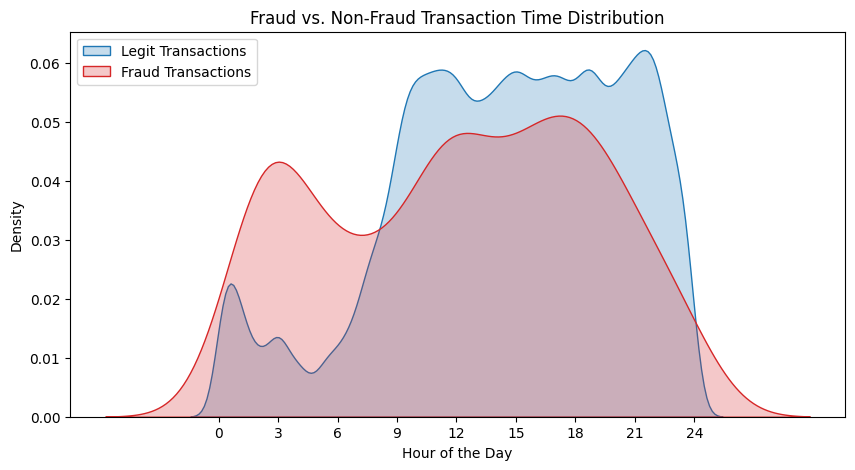

In [32]:
# Plot fraud vs. non-fraud transaction times
plt.figure(figsize=(10,5))

# KDE plot for legit transactions (Class 0)
sns.kdeplot(df[df["Class"] == 0]["Hour"], label="Legit Transactions", fill=True, color="#1f77b4")

# KDE plot for fraud transactions (Class 1)
sns.kdeplot(df[df["Class"] == 1]["Hour"], label="Fraud Transactions", fill=True, color="#d62728")

plt.title("Fraud vs. Non-Fraud Transaction Time Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.xticks(range(0, 25, 3))  # Show labels every 3 hours
plt.legend()

# Save the plot
plt.savefig("../images/fraud_vs_non_fraud_transaction_time_distribution.png")

# Show the plot
plt.show()

**Fraud vs. Non-Fraud Transaction Time Analysis**:

- **Legit transactions** (blue) are more frequent **throughout the day**, with peaks between **9 AM - 9 PM**.
- **Fraud transactions** (red) show a different pattern:
  - Higher fraud activity occurs **between midnight and early morning (1 AM - 6 AM)**.
  - Another significant fraud peak appears **between 6 AM - 12 PM**, overlapping with legit transactions.
- Fraud tends to **decrease in the late evening hours** when overall transactions also decline.
- This suggests that **fraud might be more common during off-peak hours**, possibly to avoid detection.